## Naive Bayes

Naive Bayes is a probabilistic classifier based on `Bayes’ Theorem `.

It assumes that features are independent (hence `naive`) and uses probabilities to predict the most likely class.

### Bayes’ Theorem
Bayes' theorem is a fundamental rule in probability that describes the probability of an event, given new evidence, by updating a prior belief.

For a class C and features X:
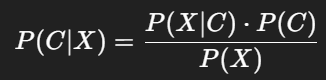

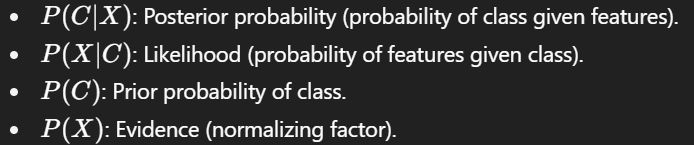

where:

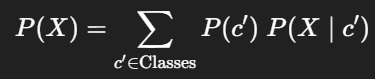

### Why "Naive"?

If we have multiple features 𝑋 = (𝑥1,𝑥2,…,𝑥𝑛), Bayes theorem requires computing 𝑃(𝑋∣𝐶). This can be very complex.

The naive assumption is:

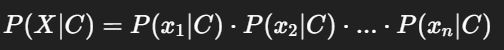

#### Apply Naive Assumption
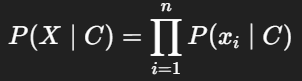

So the formula becomes:

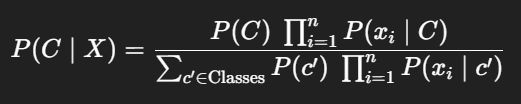

This assumes each feature contributes independently to the probability of class C.

### Why This is a Problem
In reality, features are often correlated.
- For example, in spam detection:
    - Words like `free` and `win` often appear together in spam emails.
    - Treating them as independent underestimates how strongly they indicate spam.

Another example:
- In medical diagnosis: `fever` and `cough` are not independent symptoms, they often occur together if someone has the flu.

By ignoring these dependencies:
- The computed probabilities may be inaccurate.
- Posterior estimates are not true probabilities (they’re `distorted`).

### Why Naive Bayes Still Works Well

Surprisingly, Naive Bayes often performs very well in practice, even when independence is violated, because:

1. **Relative ranking matters more than exact probability.**

    It doesn’t need perfectly accurate probabilities, just the right class ordering.

    Example

    Suppose we want to classify an email as Spam or Not Spam.

    - Naive Bayes (with independence assumption) gives:
        - 𝑃(𝑆𝑝𝑎𝑚∣𝑋) = 0.85
        - 𝑃(𝑁𝑜𝑡𝑆𝑝𝑎𝑚∣𝑋) = 0.15
    - The true probabilities (if we modeled correlations correctly) might be:
        - 𝑃(𝑆𝑝𝑎𝑚∣𝑋) = 0.70
        - 𝑃(𝑁𝑜𝑡𝑆𝑝𝑎𝑚∣𝑋) = 0.30

The numbers are different, but both models still predict Spam, because Spam > NotSpam.

2. **Simple + low data requirements.**

    It’s robust, especially with small datasets.

3. **High-dimensional text data.**

    In text classification, the independence assumption is “less harmful” because many words provide weak but independent-ish signals.

#### Steps in Naive Bayes Classification

1. **Calculate Prior Probabilities**

    From training data, compute how often each class occurs.
    Example: Spam emails = 40%, Not spam = 60%.

2. **Calculate Likelihoods**

    For each feature and class, compute probabilities.
    Example: Probability that word “free” appears in spam.

3. **Apply Bayes’ Theorem**

    Combine prior and likelihood to compute the posterior probability for each class.

4. **Predict the Class**

    Choose the class with the highest posterior probability.

#### Example: Spam Email Classification

Suppose we want to classify emails as `Spam` or `Not Spam`:
- Prior:
    - 𝑃(𝑆𝑝𝑎𝑚) = 0.4, 𝑃(𝑁𝑜𝑡𝑆𝑝𝑎𝑚) =0.6
- Likelihood (based on word frequencies):
    - P("free"∣Spam)=0.8, P("free"∣NotSpam)=0.1.
    - P("win"∣Spam)=0.7, P("win"∣NotSpam)=0.05. 
- New email: `free win`

### Types of Naive Bayes

#### 1.Gaussian Naive Bayes
- When to use:
    - Features are continuous and assumed to follow a normal (Gaussian) distribution.
- Formula for likelihood:

For a feature x given class C:

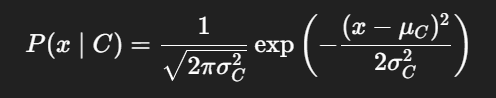

where 𝜇𝐶 and 𝜎2𝐶 are the mean and variance of feature 𝑥 within class 𝐶.

- Example:

Predicting whether a tumor is malignant/benign using continuous features like tumor size, radius, or texture.

#### 2. Multinomial Naive Bayes

For discrete counts (e.g., e.g., number of times a word appears in a document).

popular for text classification

Formula for likelihood:

If a document x has counts 𝑥1,𝑥2,…,𝑥𝑛 for vocabulary words:

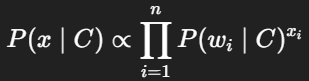

where 𝑃(𝑤𝑖 ∣ 𝐶) is the probability of word 𝑤𝑖 in class C.

Example:

Spam detection, news categorization, sentiment analysis.

#### 3. Bernoulli Naive Bayes
- When to use:
    - Features are binary (0/1 → word present or absent, feature exists or not).
- Formula for likelihood:

For each feature 𝑥𝑖:

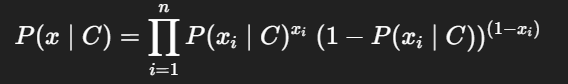

- **Difference from Multinomial:**
    - Multinomial cares about how many times a word appears.
    - Bernoulli only cares about whether it appears at all.

Example:

Classifying documents where presence/absence of keywords matters more than frequency (e.g., "free" appearing once is enough to suggest spam).

### Spam Filtering using Naive Bayes

#### Import libraries

In [18]:
# Data handling
import pandas as pd

# Train-test split
from sklearn.model_selection import train_test_split

# Feature extraction (convert text to numbers)
from sklearn.feature_extraction.text import CountVectorizer

# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load and inspect the dataset.

In [6]:
#Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# Keep only the first two columns (v1 = label, v2 = message)
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [9]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check shape (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (5572, 2)


In [11]:
# Check class distribution
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


#### Preprocessing & Train-Test Split.

In [12]:
# Separate features (X) and labels (y).
X = df['message']
y = df['label']

In [13]:
# Convert text into numeric vectors (Bag of Words)
vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X)

In [14]:
# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.3, random_state=42
)

In [15]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 3900
Testing samples: 1672


#### Train the Naive Bayes Model

In [16]:
# Initialize the model
model = MultinomialNB()

In [17]:
# Train the model on training data
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


#### Evaluate the model

In [19]:
# Predictions on training set
y_train_pred = model.predict(X_train)

In [20]:
print("Training Performance")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

Training Performance
Accuracy: 0.9943589743589744

Confusion Matrix:
 [[3365    7]
 [  15  513]]

Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3372
        spam       0.99      0.97      0.98       528

    accuracy                           0.99      3900
   macro avg       0.99      0.98      0.99      3900
weighted avg       0.99      0.99      0.99      3900



In [21]:
# Predictions on testing set
y_test_pred = model.predict(X_test)

In [22]:
print("\nTesting Performance")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Testing Performance
Accuracy: 0.9784688995215312

Confusion Matrix:
 [[1435   18]
 [  18  201]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1453
        spam       0.92      0.92      0.92       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



#### Test the model with new unseen messages

In [23]:
new_messages = [
    "Congratulations! You have won a free ticket to Bahamas. Claim now!",
    "Hey, are you coming to the meeting tomorrow?",
    "URGENT! Win a brand new car by clicking this link",
    "Good morning, just checking how you are doing"
]

In [24]:
# Transform messages into numeric vectors (same vectorizer as training)
new_vectors = vectorizer.transform(new_messages)

In [25]:
# Predict labels
predictions = model.predict(new_vectors)

In [26]:
# Show results
for msg, label in zip(new_messages, predictions):
    print(f"Message: {msg}\n --> Prediction: {label}\n")

Message: Congratulations! You have won a free ticket to Bahamas. Claim now!
 --> Prediction: spam

Message: Hey, are you coming to the meeting tomorrow?
 --> Prediction: ham

Message: URGENT! Win a brand new car by clicking this link
 --> Prediction: spam

Message: Good morning, just checking how you are doing
 --> Prediction: ham

